In [1]:
import Bio
import re
from Bio.Seq import Seq
from Bio import SeqIO
import numpy as np

deltaData=[]

deltaSeq=[]
consSeq=''      #the consensus sequence

delta=open(r'Delta10Aligned.fas','r')#bath of the aligned DNA file 


for record in SeqIO.parse(delta, "fasta"):      #function separates the sequences in fasta file
    deltaData.append(record.seq)
    
 
    
for i in range(10):                        #to get the first 10 sequences in the fasta file
    deltaSeq.append(deltaData[i])



for j in range(len(deltaSeq[0])):
    indexs=[0,0,0,0]#index=[Aindex,Cindex,Gindex,Tindex]
    for i in range(10):
        if deltaSeq[i][j]=="A":      #if the nucleotide is A increas Aindex
            indexs[0]=indexs[0]+1
        elif deltaSeq[i][j]=="C":     #if the nucleotide is C increas Cindex
            indexs[1]=indexs[1]+1
        elif deltaSeq[i][j]=="G":      #if the nucleotide is G increas Gindex
            indexs[2]=indexs[2]+1
        elif deltaSeq[i][j]=="T":      #if the nucleotide is T increas Tindex
            indexs[3]=indexs[3]+1
    maxindex=indexs.index(max(indexs))  #get the maximun index score
    if maxindex==0:                    #if A maximum add A
        consSeq=consSeq+'A'   
    elif maxindex==1:                   #if C maximum add C
        consSeq=consSeq+'C'
    elif maxindex==2:                   #if G maximum add G
        consSeq=consSeq+'G'
    elif maxindex==3:                   #if T maximum add T
        consSeq=consSeq+'T'

    
#print(consSeq)


Delta of hCoV-19 Consensus Sequence has : 
C ratio 0.1832806084673891
G ratio 0.19617015548226424
T ratio 0.32163290031634917
A ratio 0.29891633573399745
CG ratio 0.3794507639496534


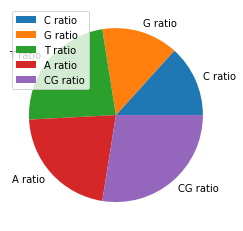

In [2]:
import matplotlib.pyplot as plt

print ("Delta of hCoV-19 Consensus Sequence has : ")

C_num = re.findall(r"C",consSeq)       #Appending all the C nucleotides of the consSeq to an array
C_ratio_delta =len(C_num)/len(consSeq) #percentage from the whole dna 
print ("C ratio",C_ratio_delta)


G_num = re.findall(r"G",consSeq)
G_ratio_delta =len(G_num)/len(consSeq)  #Appending all the G nucleotides of the consSeq to an array
print ("G ratio",G_ratio_delta)     #Cpercentage from the whole dna

T_num = re.findall(r"T",consSeq)        #Appending all the T nucleotides of the consSeq to an array
T_ratio_delta =len(T_num)/len(consSeq)  #percentage from the whole dna
print ("T ratio",T_ratio_delta)


A_num = re.findall(r"A",consSeq)       #Appending all the A nucleotides of th consSeq to an array
A_ratio_delta =len(A_num)/len(consSeq) #percentage from the whole dna 
print ("A ratio",A_ratio_delta)



CG_ratio_delta =(len(G_num)+len(C_num))/len(consSeq)  #percentage of both C and G from the whole dna 
print ("CG ratio",CG_ratio_delta)

# a pie chart of the data 

y = np.array([C_ratio_delta, G_ratio_delta,T_ratio_delta,A_ratio_delta,CG_ratio_delta])
mylabels = ["C ratio", "G ratio", "T ratio", "A ratio","CG ratio"]
plt.pie(y,normalize=True,labels = mylabels)
plt.legend()
plt.show() 

In [3]:
# initialize empty arrays to append the ratios of constituents in all the 10 dna strands 
C_tot_omicron = []
G_tot_omicron = []
T_tot_omicron = []
A_tot_omicron = []
CG_tot_omicron = []
i = 1
for record in SeqIO.parse("10omicronFas.fas", "fasta"): # iterate over the 10 dna starnds
    dna = str(record.seq) # convert to string for searching 
    print (record.description[0:35],"has : ") # print each nucleotide ID before printing it's ratios 
    
    C_num = re.findall(r"C",dna) #Nucleotide Searching 
    print ("C ratio",len(C_num)/len(dna)) 
    C_tot_omicron.append(len(C_num)/len(dna)) #Calculate ratios and append to the array 
    
    G_num = re.findall(r"G",dna)  #Nucleotide Searching
    print ("G ratio",len(G_num)/len(dna))
    G_tot_omicron.append(len(G_num)/len(dna)) #Calculate ratios and append to the array 
    
    T_num = re.findall(r"T",dna) #Nucleotide Searching
    print ("T ratio",len(T_num)/len(dna))
    T_tot_omicron.append(len(T_num)/len(dna)) #Calculate ratios and append to the array 
    
    A_num = re.findall(r"A",dna) #Nucleotide Searching
    print ("A ratio",len(A_num)/len(dna))
    A_tot_omicron.append(len(A_num)/len(dna)) #Calculate ratios and append to the array 
    
    
    print ("CG ratio",(len(G_num)+len(C_num))/len(dna))
    CG_tot_omicron.append((len(G_num)+len(C_num))/len(dna)) #Calculate ratios of C and G together and append to the array 
    
    print(" ")



omicron hCoV-19/Botswana/R59B33 BHP has : 
C ratio 0.18072289156626506
G ratio 0.19364609275089184
T ratio 0.31658477485360437
A ratio 0.2948778353638016
CG ratio 0.37436898431715687
 
omicron hCoV-19/Botswana/R59B34 BHP has : 
C ratio 0.18072289156626506
G ratio 0.19367974692064346
T ratio 0.3165174665141011
A ratio 0.2948441811940499
CG ratio 0.3744026384869085
 
omicron hCoV-19/Botswana/R59B36 BHP has : 
C ratio 0.18075654573601668
G ratio 0.19364609275089184
T ratio 0.3165511206838527
A ratio 0.2948778353638016
CG ratio 0.3744026384869085
 
omicron hCoV-19/Botswana/R59B37 BHP has : 
C ratio 0.18075654573601668
G ratio 0.19367974692064346
T ratio 0.3166520831931076
A ratio 0.2948441811940499
CG ratio 0.3744362926566602
 
omicron hCoV-19/Botswana/R59B38 BHP has : 
C ratio 0.1788719122299253
G ratio 0.19219896345157164
T ratio 0.31520495389378744
A ratio 0.29279127683920037
CG ratio 0.37107087568149694
 
omicron hCoV-19/Botswana/R59B39 BHP has : 
C ratio 0.18068923739651344
G ratio 0.

Omicron of hCoV-19 in Botswana has :
Average C ratio of  0.17939355186107558
Average G ratio of  0.19249175472841085
Average T ratio of  0.3154674564178502
Average A ratio of  0.2932792623005991
Average CG ratio of  0.3718853065894864


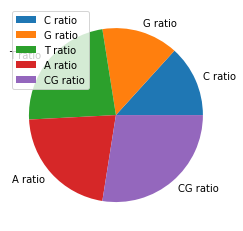

In [4]:
#ratios average 

print ("Omicron of hCoV-19 in Botswana has :")
print("Average C ratio of " ,np.average(C_tot_omicron))  
print("Average G ratio of " ,np.average(G_tot_omicron))  
print("Average T ratio of " ,np.average(T_tot_omicron))  
print("Average A ratio of " ,np.average(A_tot_omicron))  
print("Average CG ratio of " ,np.average(CG_tot_omicron))  

#Pie Chart Generation

y = np.array([np.average(C_tot_omicron), np.average(G_tot_omicron),np.average(T_tot_omicron),np.average(A_tot_omicron),np.average(CG_tot_omicron)])
mylabels = ["C ratio", "G ratio", "T ratio", "A ratio","CG ratio"]
plt.pie(y,normalize=True,labels = mylabels)
plt.legend()
plt.show() 

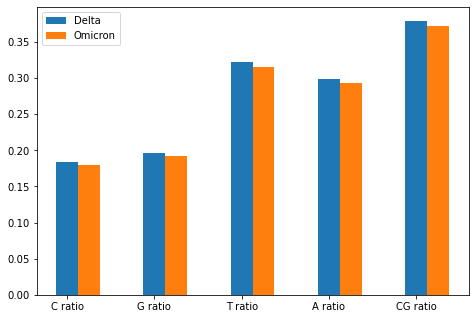

In [5]:
#bar chart comparison

data1 = [C_ratio_delta, G_ratio_delta,T_ratio_delta,A_ratio_delta,CG_ratio_delta]
data2 = [np.average(C_tot_omicron), np.average(G_tot_omicron),np.average(T_tot_omicron),np.average(A_tot_omicron),np.average(CG_tot_omicron)]

X = np.arange(len(data1))
labels = ["C ratio", "G ratio", "T ratio", "A ratio","CG ratio"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, data1, width = 0.25)
ax.bar(X + 0.25,data2, width = 0.25)

ax.legend(labels=['Delta', 'Omicron'])
